## seaborn-analyzer

In [1]:
%load_ext lab_black

<Figure size 432x288 with 0 Axes>

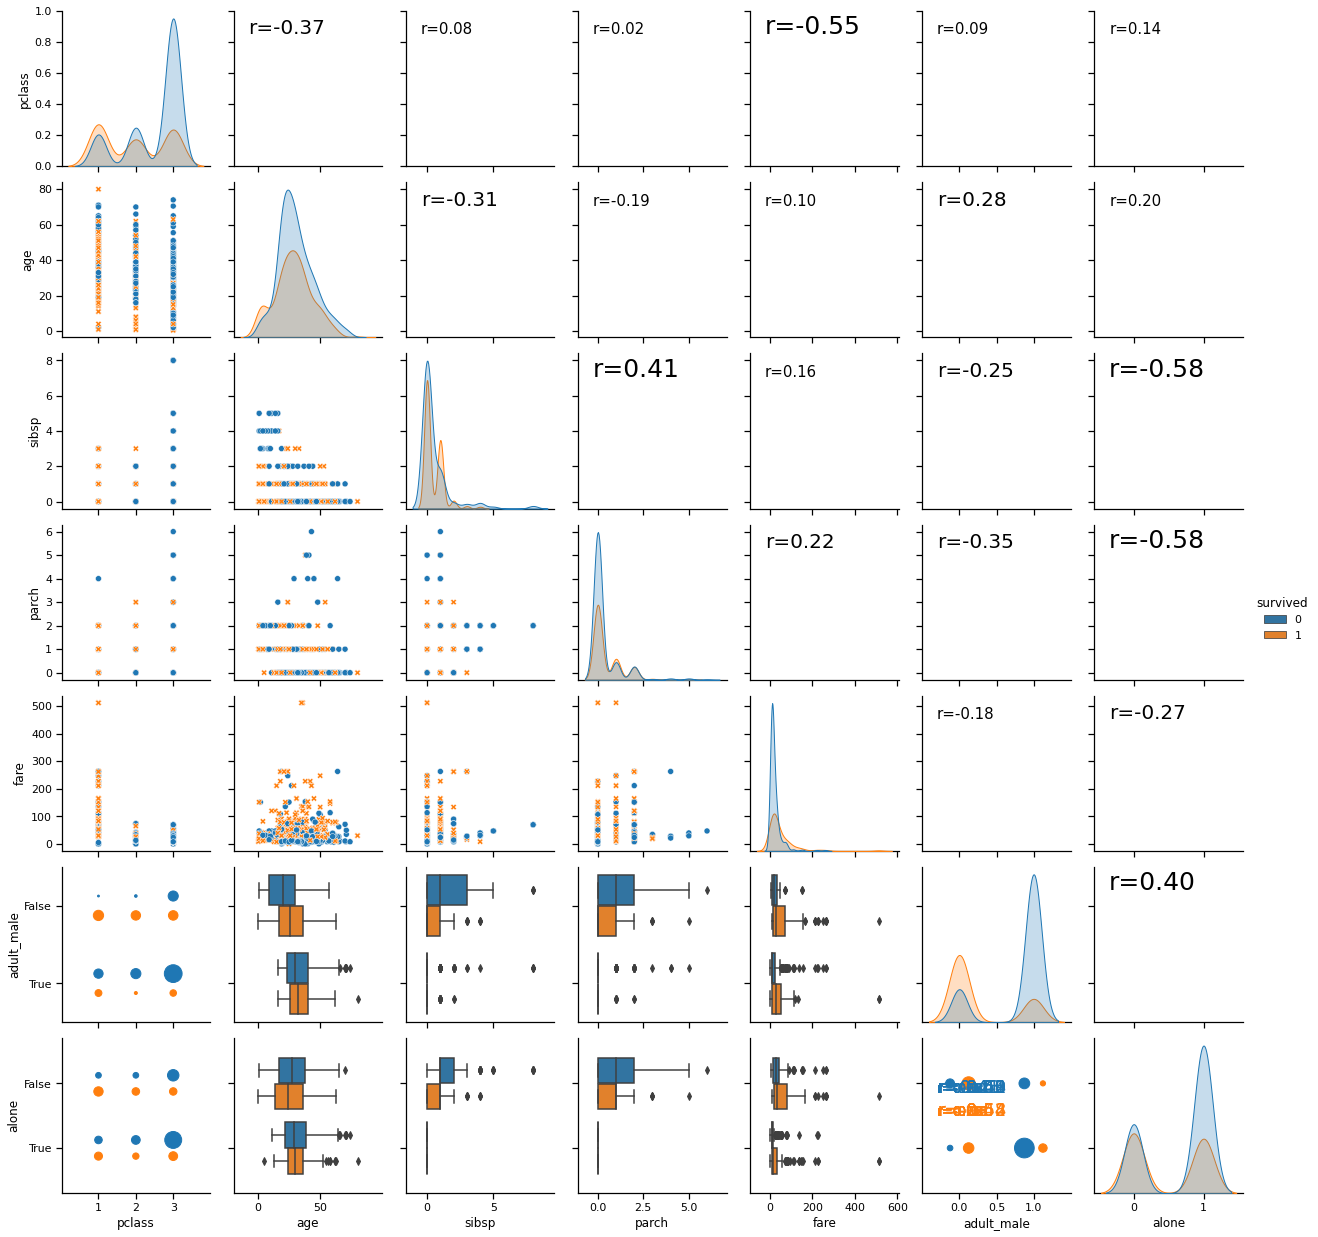

In [2]:
from seaborn_analyzer import CustomPairPlot
import seaborn as sns

titanic = sns.load_dataset("titanic")
cp = CustomPairPlot()
cp.pairanalyzer(titanic, hue="survived")

#### CustomPairPlot.pairanalyzer

<Figure size 432x288 with 0 Axes>

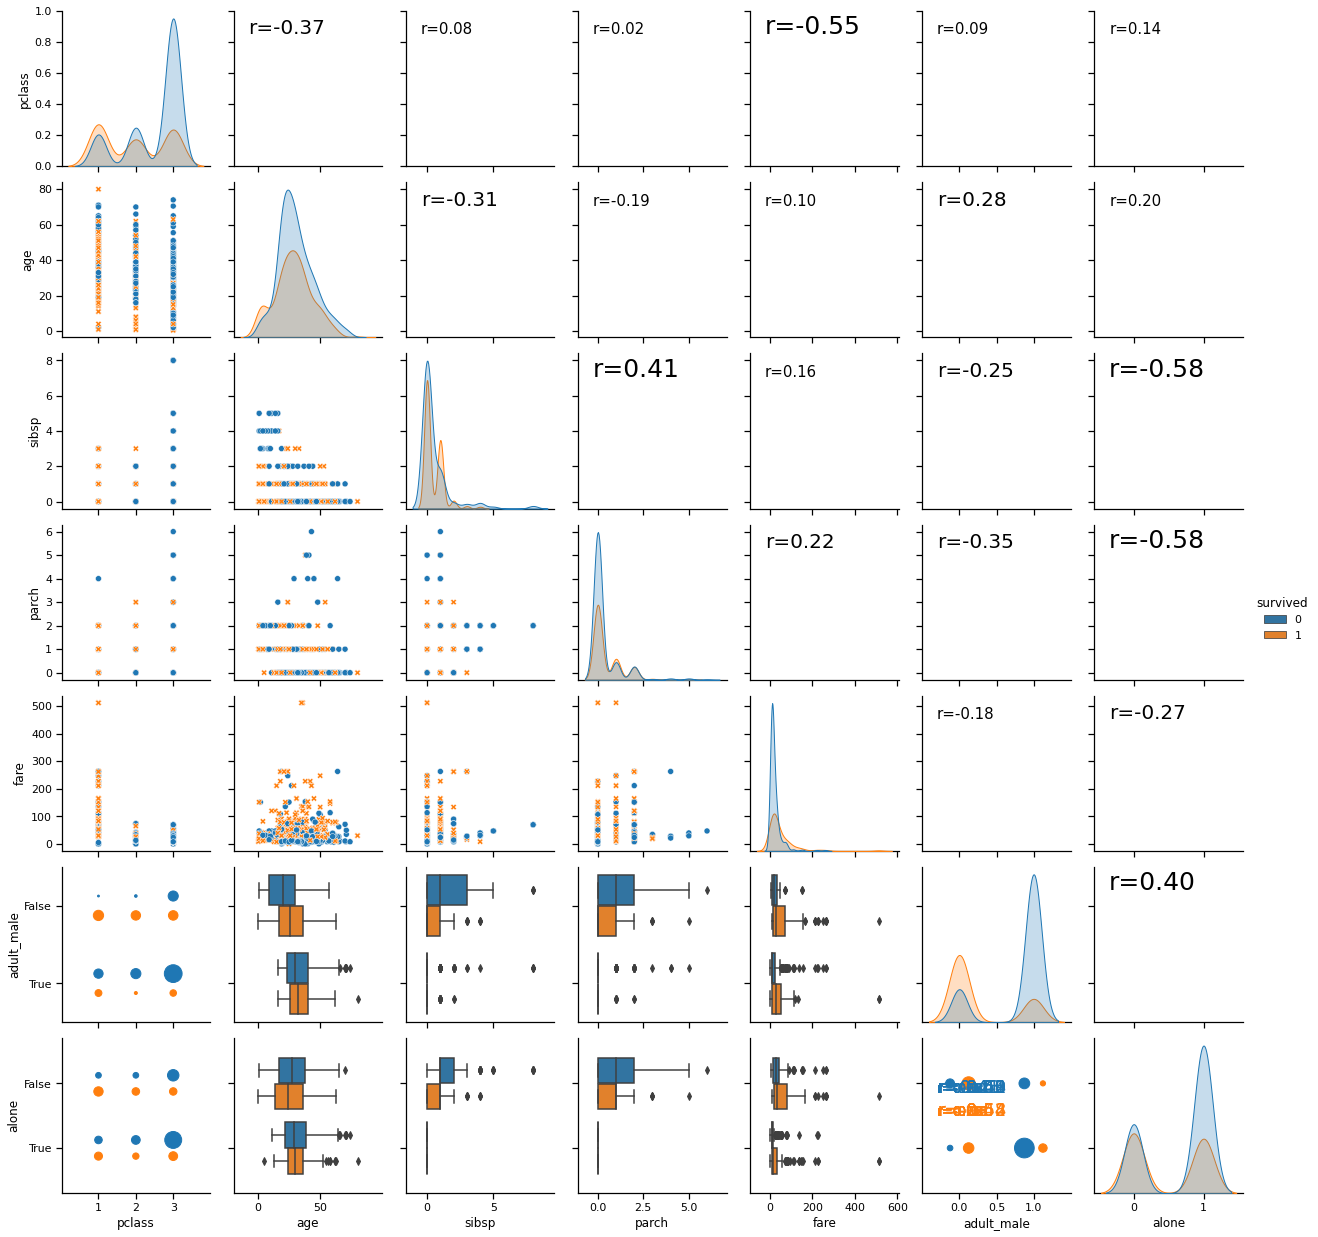

In [3]:
from seaborn_analyzer import CustomPairPlot
import seaborn as sns

titanic = sns.load_dataset("titanic")
cp = CustomPairPlot()
cp.pairanalyzer(titanic, hue="survived")

#### hist.plot_normality

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

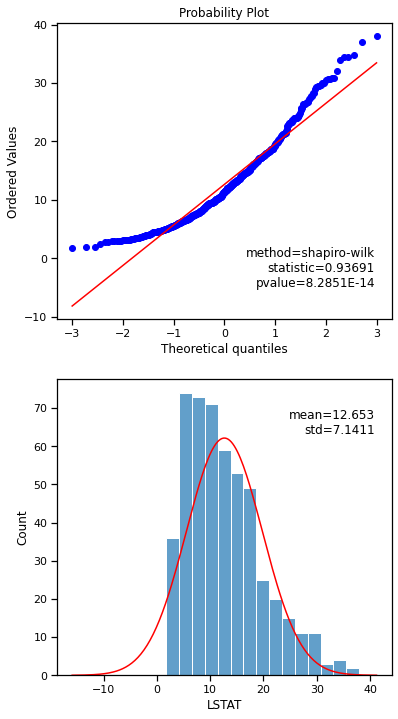

In [4]:
from seaborn_analyzer import hist
from sklearn.datasets import load_boston
import pandas as pd

df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
hist.plot_normality(df, x="LSTAT", norm_hist=False, rounddigit=5)

#### hist.fit_dist

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

,RSS,AIC,BIC
norm,0.002340,3428.416580,3436.869653
gamma,0.000487,3306.404632,3319.084242
lognorm,0.000802,3320.286602,3332.966212
uniform,0.009460,3637.245443,3645.698516


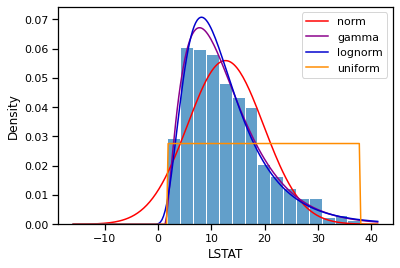

In [5]:
from seaborn_analyzer import hist
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
all_params, all_scores = hist.fit_dist(
    df, x="LSTAT", dist=["norm", "gamma", "lognorm", "uniform"]
)
df_scores = pd.DataFrame(all_scores).T
df_scores

#### classplot.class_separator_plot

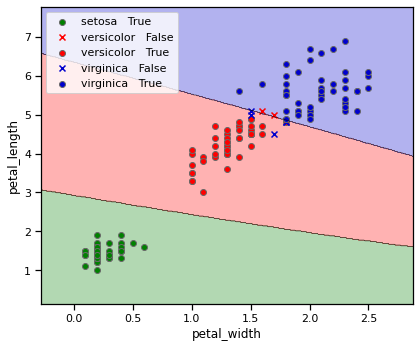

In [6]:
import seaborn as sns
from sklearn.svm import SVC
from seaborn_analyzer import classplot

iris = sns.load_dataset("iris")
clf = SVC()
classplot.class_separator_plot(clf, ["petal_width", "petal_length"], "species", iris)

#### classplot.plot_roc_curve_multiclass

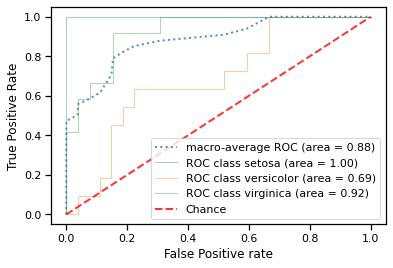

In [7]:
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from seaborn_analyzer import classplot

# Load dataset
iris = sns.load_dataset("iris")
OBJECTIVE_VARIALBLE = "species"  # Objective variable
USE_EXPLANATORY = [
    "petal_width",
    "petal_length",
    "sepal_width",
    "sepal_length",
]  # Explantory variables
y = iris[OBJECTIVE_VARIALBLE].values
X = iris[USE_EXPLANATORY].values
# Add random noise features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 10 * n_features)]
# Plot ROC curve in multiclass classification
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)
estimator = SVC(probability=True, random_state=42)
classplot.plot_roc_curve_multiclass(
    estimator, X_train, y_train, X_test=X_test, y_test=y_test
)
plt.plot([0, 1], [0, 1], label="Chance", alpha=0.8, lw=2, color="red", linestyle="--")
plt.legend(loc="lower right")

#### regplot.linear_plot

No handles with labels found to put in legend.


<AxesSubplot:xlabel='petal_length', ylabel='sepal_length'>

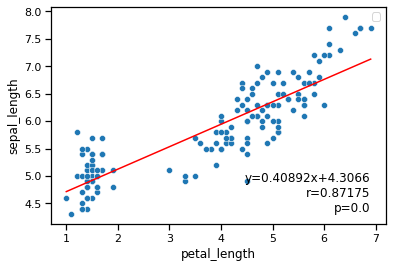

In [8]:
from seaborn_analyzer import regplot
import seaborn as sns

iris = sns.load_dataset("iris")
regplot.linear_plot(x="petal_length", y="sepal_length", data=iris)

#### regplot.regression_plot_1d

No handles with labels found to put in legend.


{'mae': 0.2748397619059694}

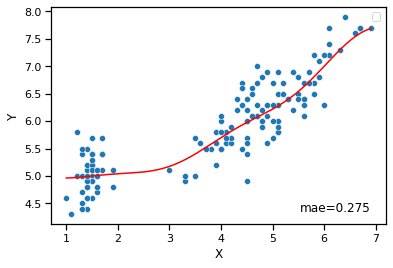

In [9]:
from seaborn_analyzer import regplot
import seaborn as sns
from sklearn.svm import SVR

iris = sns.load_dataset("iris")
regplot.regression_plot_1d(SVR(), x="petal_length", y="sepal_length", data=iris)